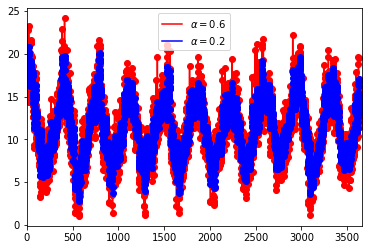

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

dataset = open("temperatures.csv", "r")

x = dataset.readline()
x = dataset.readlines()

dates = list()
snos = list()
temps = list()

for i in range(len(x)):
	a, b = x[i].strip().split(",")
	if b[0] == "?":
		b = b[1:]
	dates.append(a)
	temps.append(float(b))
	snos.append(i)

df = {"index":snos, "temp":temps}
df = pd.DataFrame(df)
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()


fit2 = SimpleExpSmoothing(df['temp']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

fit1 = SimpleExpSmoothing(df['temp']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

plt.show()
